In [11]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [3]:
path = "C:/Studia/Magisterka/Faints-Prediction/"
BP_filename = "BP.csv"
HR_filename = "HR.csv"

train_indices =  [str(indx[0]) for indx in pd.read_csv(path + "DATA/training_set.txt", header=None).values.tolist()]
test_indices =  [str(indx[0]) for indx in pd.read_csv(path + "DATA/test_set.txt", header=None).values.tolist()]
validation_indices =  [str(indx[0]) for indx in pd.read_csv(path + "DATA/validation_set.txt", header=None).values.tolist()]
all_indices = train_indices + test_indices + validation_indices

In [4]:
BP_data = pd.read_csv(path + "DATA/" + BP_filename, low_memory=False)[all_indices]
HR_data = pd.read_csv(path + "DATA/" + HR_filename, low_memory=False)[all_indices]
labels = {col: BP_data[col].iloc[0] for col in BP_data}

BP_max_value = BP_data.iloc[1:].astype(np.float32).max().max()
BP_min_value = BP_data.iloc[1:].astype(np.float32).min().min()
HR_max_value = HR_data.iloc[1:].astype(np.float32).max().max()
HR_min_value = HR_data.iloc[1:].astype(np.float32).min().min()

BP_scaler = MinMaxScaler().fit(np.array([BP_min_value, BP_max_value]).reshape(-1,1))
HR_scaler = MinMaxScaler().fit(np.array([HR_min_value, HR_max_value]).reshape(-1,1))

BP_data_scaled = BP_data.iloc[1:].astype(np.float32).copy()
BP_data_scaled[all_indices] = BP_scaler.transform(BP_data_scaled[all_indices])

HR_data_scaled = HR_data.iloc[1:].astype(np.float32).copy()
HR_data_scaled[all_indices] = HR_scaler.transform(HR_data_scaled[all_indices])

BP_data_orig = BP_data.iloc[1:].astype(np.float32).copy()
HR_data_orig = HR_data.iloc[1:].astype(np.float32).copy()

In [5]:
# SMOOTHING
BP_data_orig_averaged = BP_data_orig.rolling(60).mean()
HR_data_orig_averaged = HR_data_orig.rolling(60).mean()

In [8]:
indexes = ['1', '92', '110', '158', '286', '295', '375', '393', '460', '501', '606', '658', '675']
# 409, 419, 538, 559, 320 sa zbyt zamotane lub nie ma tam spadow parametrow zyciowych

def label_func(start, end, color):
    for i in range(start, end):
        BP_HR_validation_labels[index][i] = color

BP_HR_validation_labels = dict()
BP_validation = dict()
HR_validation = dict()
for index in indexes:
    BPx = np.array(BP_data_orig_averaged[index])
    HRx = np.array(HR_data_orig_averaged[index])
    BPx = BPx[~np.isnan(BPx)]
    HRx = HRx[~np.isnan(HRx)]
    BPx = BPx[:-(BPx.shape[0] % 32)]
    HRx = HRx[:-(HRx.shape[0] % 32)]
    BPxs = np.array(np.array_split(BPx, int(len(BPx)/32)))
    HRxs = np.array(np.array_split(HRx, int(len(HRx)/32)))
    print("Index: " + index + ' Len:' + str(len(BPxs)))
    BP_HR_validation_labels[index] = np.array(['g']*len(BPxs))
    BP_validation[index] = BPxs
    HR_validation[index]= HRxs

Index: 1 Len:116
Index: 92 Len:154
Index: 110 Len:128
Index: 158 Len:128
Index: 286 Len:134
Index: 295 Len:144
Index: 375 Len:168
Index: 393 Len:45
Index: 460 Len:81
Index: 501 Len:125
Index: 606 Len:83
Index: 658 Len:72
Index: 675 Len:109


In [9]:
# 320 bad      375 good

index = '375'

BPx = np.array(BP_data_orig_averaged[index])
HRx = np.array(HR_data_orig_averaged[index])
BPx = BPx[~np.isnan(BPx)]
HRx = HRx[~np.isnan(HRx)]
BPx = BPx[:-(BPx.shape[0] % 32)]
HRx = HRx[:-(HRx.shape[0] % 32)]
BPxs = np.array(np.array_split(BPx, int(len(BPx)/32)))
HRxs = np.array(np.array_split(HRx, int(len(HRx)/32)))


BP_HR_validation_labels = dict()

BP_validation[index] = BPxs
HR_validation[index]= HRxs
BP_HR_validation_labels[index] = np.array(['g']*len(BPxs))

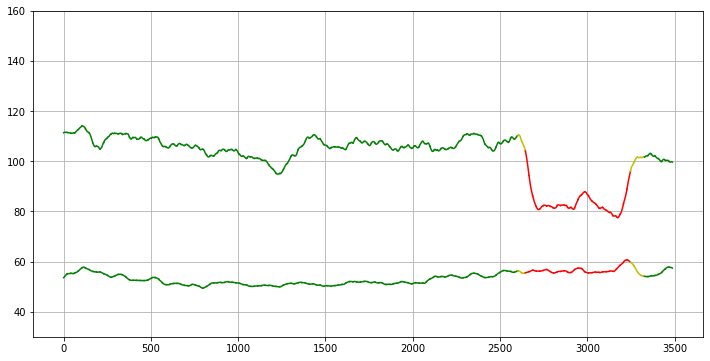

In [335]:
#675
wsp = len(BPxs)/168
label_func(int(124*wsp), int(wsp*126), 'y')
label_func(int(wsp*126), int(wsp*156), 'r')
label_func(int(wsp*156), int(wsp*160), 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

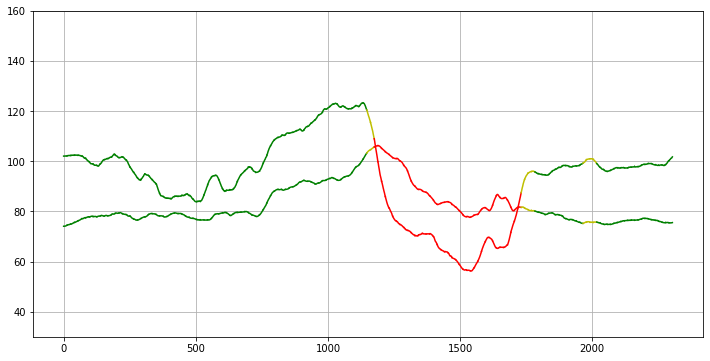

In [303]:
#658
label_func(82, 84, 'y')
label_func(84, 124, 'r')
label_func(124, 128, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

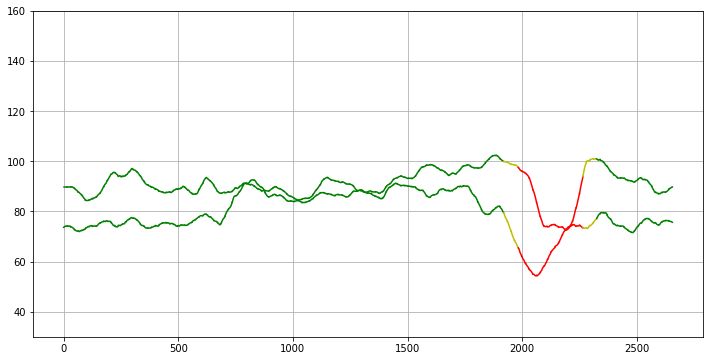

In [292]:
#606
label_func(120, 124, 'y')
label_func(124, 142, 'r')
label_func(142, 146, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

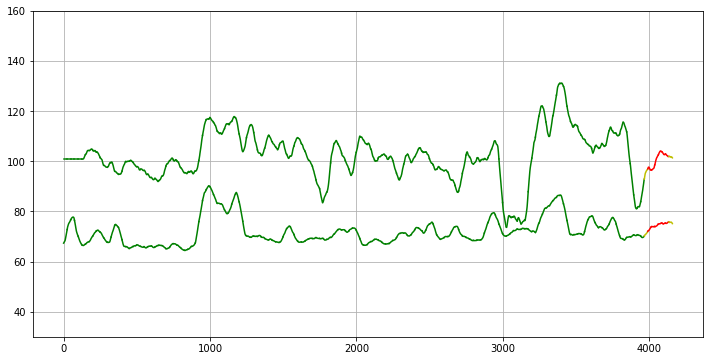

In [278]:
#559 ???
label_func(160, 161, 'y')
label_func(161, 167, 'r')
label_func(167, 168, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

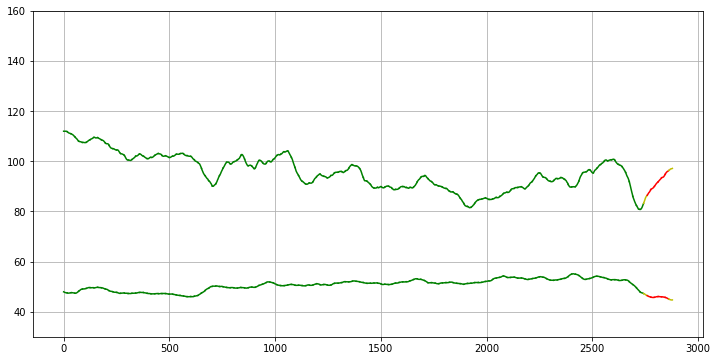

In [276]:
#538 ???
label_func(160, 161, 'y')
label_func(161, 167, 'r')
label_func(167, 168, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

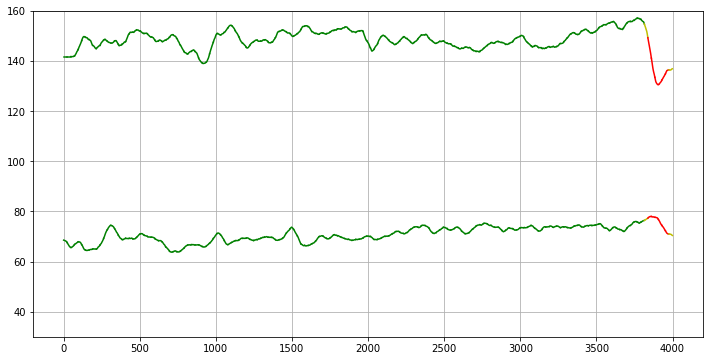

In [274]:
#501
label_func(160, 161, 'y')
label_func(161, 167, 'r')
label_func(167, 168, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

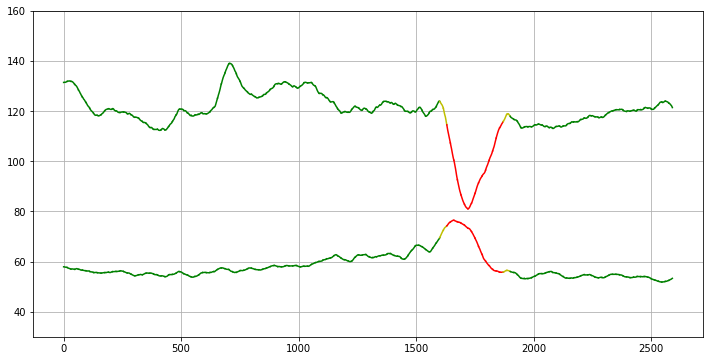

In [264]:
#460
label_func(102, 104, 'y')
label_func(104, 120, 'r')
label_func(120, 122, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

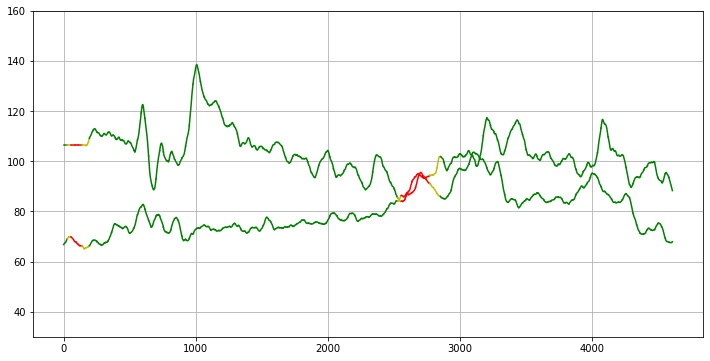

In [257]:
#419 ???
label_func(1, 2, 'y')
label_func(2, 5, 'r')
label_func(5, 7, 'y')

label_func(91, 92, 'y')
label_func(92, 100, 'r')
label_func(100, 103, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

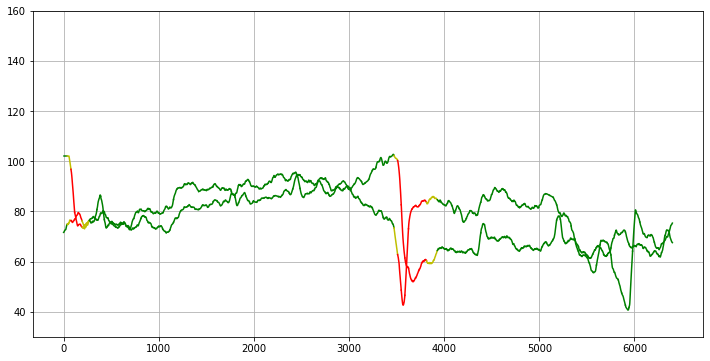

In [255]:
#409 ???
label_func(1, 2, 'y')
label_func(2, 5, 'r')
label_func(5, 7, 'y')

label_func(91, 92, 'y')
label_func(92, 100, 'r')
label_func(100, 103, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

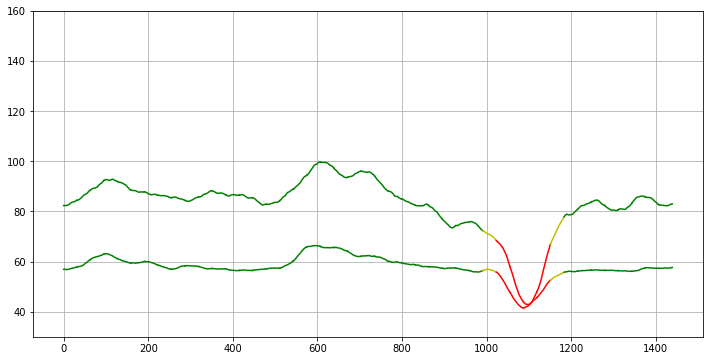

In [345]:
#393
label_func(31, 32, 'y')
label_func(32, 36, 'r')
label_func(36, 37, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

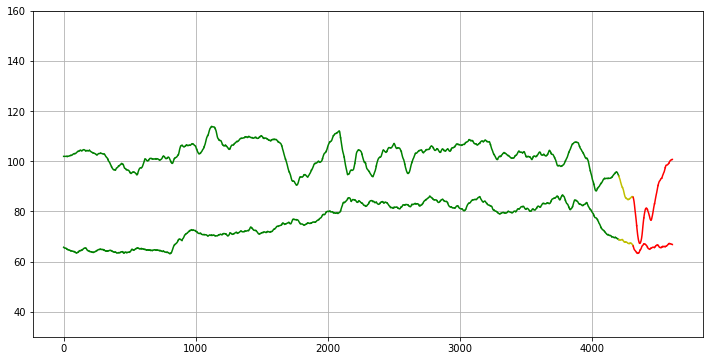

In [232]:
#295
label_func(153, 157, 'y')
label_func(157, 168, 'r')
# label_func(162, 165, 'y')
# label_func(165, 168, 'r')


plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

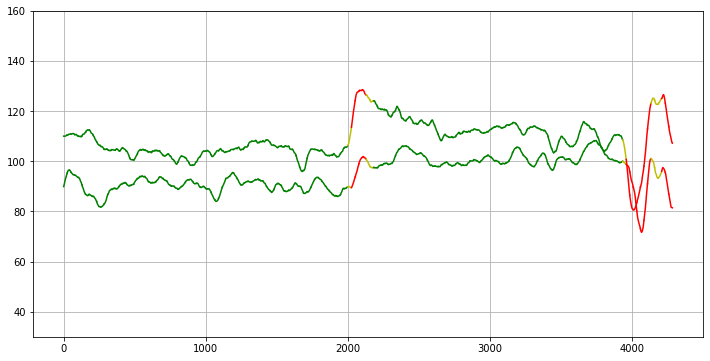

In [228]:
#286
label_func(77, 78, 'y')
label_func(78, 82, 'r')
label_func(82, 84, 'y')
label_func(154, 155, 'y')
label_func(155, 162, 'r')
label_func(162, 165, 'y')
label_func(165, 168, 'r')


plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

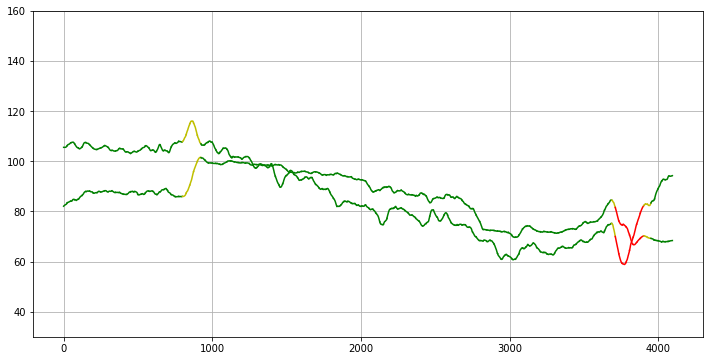

In [213]:
#158
label_func(32, 37, 'y')
label_func(151, 152, 'y')
label_func(152, 160, 'r')
label_func(160, 162, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

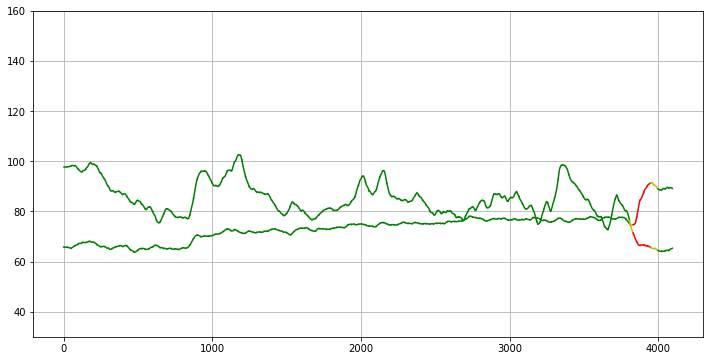

In [196]:
#110
label_func(156, 157, 'y')
label_func(157, 162, 'r')
label_func(162, 164, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

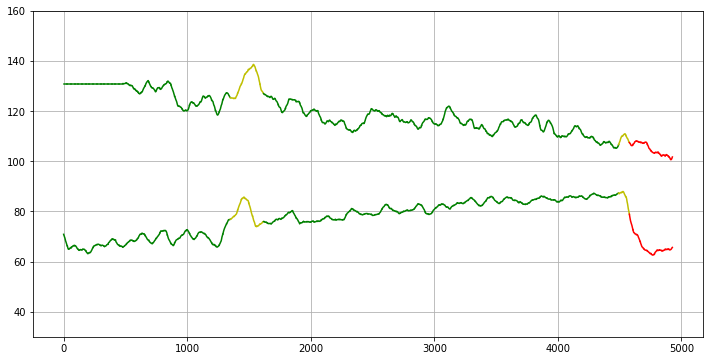

In [168]:
#92
label_func(45, 54, 'y')
label_func(153, 156, 'y')
label_func(156, 168, 'r')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

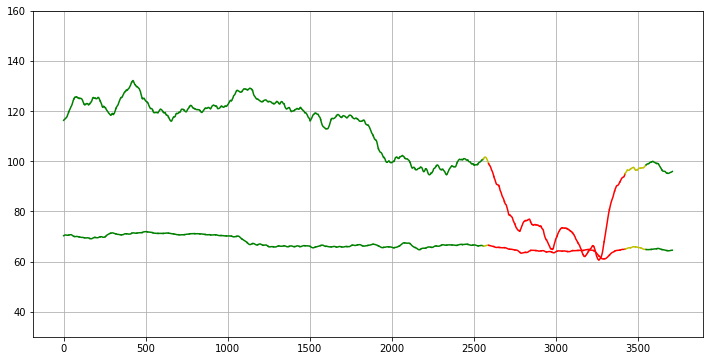

In [341]:
#1
label_func(80, 81, 'y')
label_func(81, 107, 'r')
label_func(107, 111, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

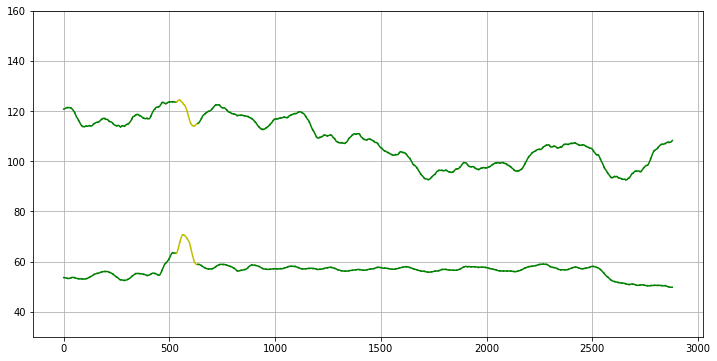

In [134]:
#320 ???
label_func(30, 36, 'y')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

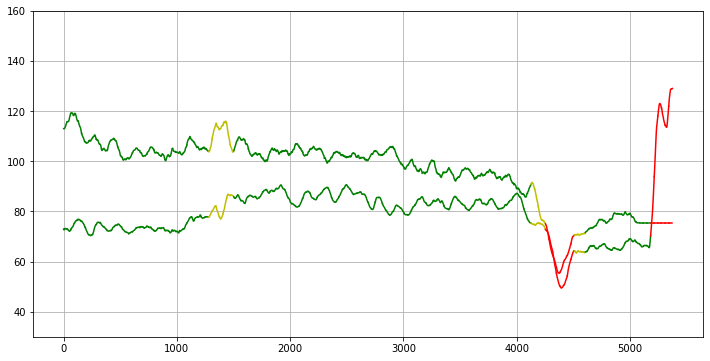

In [12]:
#375
label_func(40, 47, 'y')
label_func(129, 133, 'y')
label_func(133, 141, 'r')
label_func(141, 144, 'y')
label_func(162, 168, 'r')

plt.figure(figsize = (12,6))
plt.ylim((30,160))
plt.grid()
t = 0
for BP_interval, HR_interval, label in zip(BP_validation[index], HR_validation[index], BP_HR_validation_labels[index]):
    if t == 0:
        time_range = range(t, t + len(BP_interval)) 
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval)
    else:
        time_range = range(t - 1, t + len(BP_interval)) 
        BP_interval = np.concatenate(([BP_last_elem], BP_interval))
        HR_interval = np.concatenate(([HR_last_elem], HR_interval))
        plt.plot(time_range, BP_interval, color=label, linestyle='-')
        plt.plot(time_range, HR_interval, color=label, linestyle='-')
        t += len(BP_interval) - 1
    BP_last_elem = BP_interval[-1]
    HR_last_elem = HR_interval[-1]

In [ ]:
def label_func(index, start, end, color):
    for i in range(start, end):
        BP_HR_validation_labels[index][i] = color

index = '1'
label_func('1', 80, 81, 'y')
label_func('1', 81, 107, 'r')
label_func('1', 107, 111, 'y')
index = '375'
label_func('375', 40, 47, 'y')
label_func('375', 129, 133, 'y')
label_func('375', 133, 141, 'r')
label_func('375', 141, 144, 'y')
label_func('375', 162, 168, 'r')
index = '92' 
label_func('92', 41, 49, 'y')
label_func('92', 140, 143, 'y')
label_func('92', 143, 154, 'r')
index = '110' 
label_func('110', 119, 120, 'y')
label_func('110', 120, 123, 'r')
label_func('110', 123, 125, 'y')
index = '158' 
label_func('158', 24, 28, 'y')
label_func('158', 115, 116, 'y')
label_func('158', 116, 122, 'r')
label_func('158', 122, 123, 'y')
index = '286' 
label_func('286', 61, 62, 'y')
label_func('286', 62, 65, 'r')
label_func('286', 65, 67, 'y')
label_func('286', 123, 124, 'y')
label_func('286', 124, 129, 'r')
label_func('286', 129, 131, 'y')
label_func('286', 131, 134, 'r')
index = '295' 
label_func('295', 131, 134, 'y')
label_func('295', 134, 144, 'r')
index = '393' 
label_func('393', 31, 32, 'y')
label_func('393', 32, 36, 'r')
label_func('393', 36, 37, 'y')
index = '460' 
label_func('460', 49, 50, 'y')
label_func('460', 50, 58, 'r')
label_func('460', 58, 59, 'y')
index = '501'
label_func('501', 119, 120, 'y')
label_func('501', 120, 124, 'r')
label_func('501', 124, 125, 'y')
index = '606'
label_func('606', 59, 61, 'y')
label_func('606', 61, 70, 'r')
label_func('606', 70, 72, 'y')
index = '658', 
label_func('658', 35, 36, 'y')
label_func('658', 36, 53, 'r')
label_func('658', 53, 55, 'y')
index ='675', 
label_func('675', 80, 82, 'y')
label_func('675', 82, 101, 'r')
label_func('675', 101, 104, 'y')